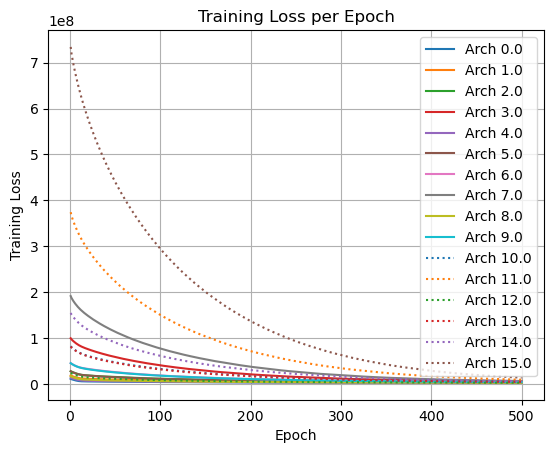

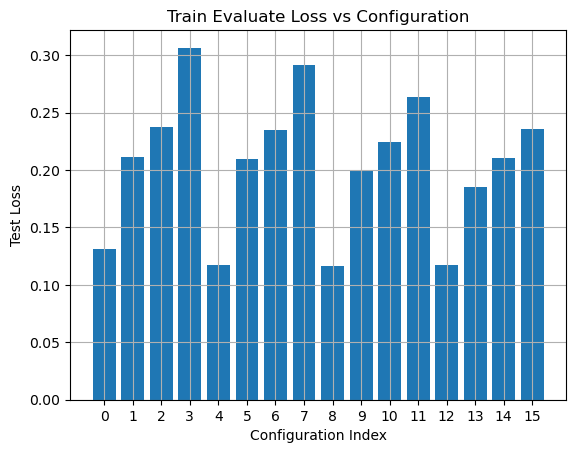

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools

# Load the CSV file
csv_file_path = 'results_VAD.csv'
df = pd.read_csv(csv_file_path)

# Plot training loss per epoch for architectures that have gone below 0.19
def plot_training_loss_below_threshold(df, threshold=0.19):
    num_epochs = df.shape[1] - 2  # Subtract 2 for 'Index' and 'Final Test Loss'

    color_cycle = itertools.cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])  # Default color cycle
    color_used = {}  # Dictionary to track color usage

    for index, row in df.iterrows():
        train_loss = row[1:-1].values  # Skip 'Index' and 'Final Test Loss'

        # Get the next color
        color = next(color_cycle)

        # Check if the color has already been used
        if color in color_used:
            linestyle = ':'  # Use dotted line style for repeated colors
        else:
            linestyle = '-'  # Use solid line style for new colors
            color_used[color] = True  # Mark color as used

        # Plot the training loss
        plt.plot(range(1, len(train_loss) + 1), train_loss, label=f'Arch {row["Index"]}', color=color, linestyle=linestyle)

    plt.xlabel('Epoch')
    plt.ylabel('Training Loss')
    plt.title(f'Training Loss per Epoch')
    # plt.ylim([2e6, 6e6])
    # plt.xlim([450, 500])
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot test loss vs architecture for those that went below threshold
def plot_test_loss_below_threshold(df, threshold=0.9):
    below_threshold_indices = []

    # Collect architectures that have gone below the threshold
    for index, row in df.iterrows():
        train_loss = row[1:-1].values  # Skip 'Index' and 'Final Test Loss'
        below_threshold_indices.append(row["Index"])

    # Filter DataFrame to include only those architectures
    filtered_df = df[df['Index'].isin(below_threshold_indices)]

    test_losses = filtered_df['Final Train Loss'].values  # Get the final test loss column
    arch_indices = filtered_df['Index'].values  # Get the architecture indices

    plt.bar(arch_indices, test_losses)
    plt.xlabel('Configuration Index')
    plt.ylabel('Test Loss')
    plt.title(f'Train Evaluate Loss vs Configuration')
    plt.xticks(arch_indices)  # Set x-axis labels to architecture indices
    plt.grid(True)
    plt.show()

# Call the updated plotting functions
plot_training_loss_below_threshold(df, threshold=0.5)
plot_test_loss_below_threshold(df, threshold=0.5)
